In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from umap import UMAP
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from ladybirdmnist.datasets import LadybirdMNIST

In [2]:
dataset_name = "morph-28"
np.random.seed(42)
train_dataset = LadybirdMNIST(root="./data", train=True, download=True, dataset=[dataset_name])

In [3]:
# preprocessing
scaler = StandardScaler()
data_scaled = scaler.fit_transform(np.array(train_dataset.data[0]).reshape(-1, 28*28))

In [10]:
# dimensionality reduction
pca = PCA(n_components=50)
data_pca = pca.fit_transform(data_scaled)

umap = UMAP(n_components=2, random_state=42)
data_umap_pca = umap.fit_transform(data_pca)

c:\Users\smwoo\anaconda3\envs\ladybirdmnist\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\smwoo\anaconda3\envs\ladybirdmnist\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


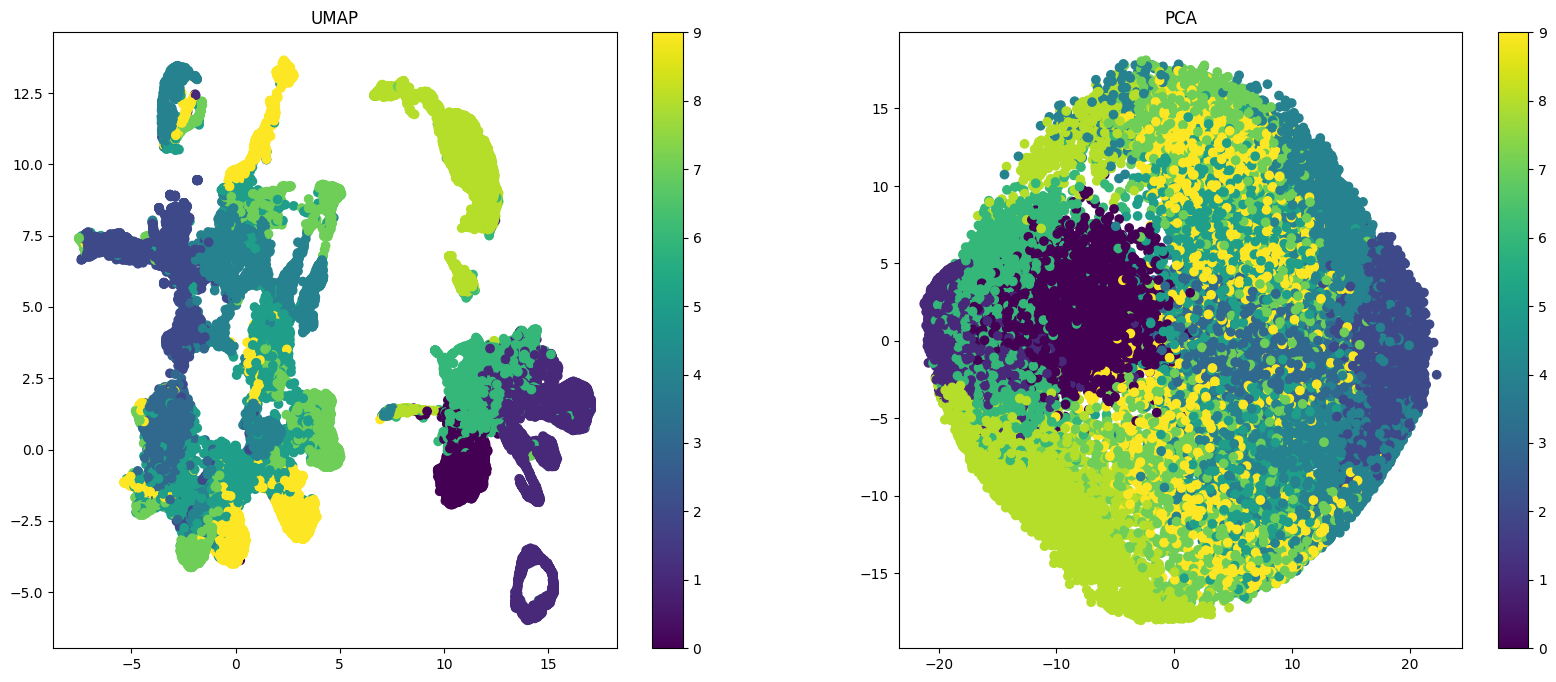

In [11]:
# visualization original data
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.scatter(data_umap_pca[:, 0], data_umap_pca[:, 1], c=np.array(train_dataset.label), cmap='viridis')
plt.colorbar()
plt.title("UMAP")   

# visualization PCA
plt.subplot(1, 2, 2)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=np.array(train_dataset.label), cmap='viridis')
plt.colorbar()
plt.title("PCA")

plt.show()

In [12]:
umap = UMAP(n_components=2, random_state=42)
data_umap = umap.fit_transform(data_scaled)

c:\Users\smwoo\anaconda3\envs\ladybirdmnist\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\smwoo\anaconda3\envs\ladybirdmnist\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


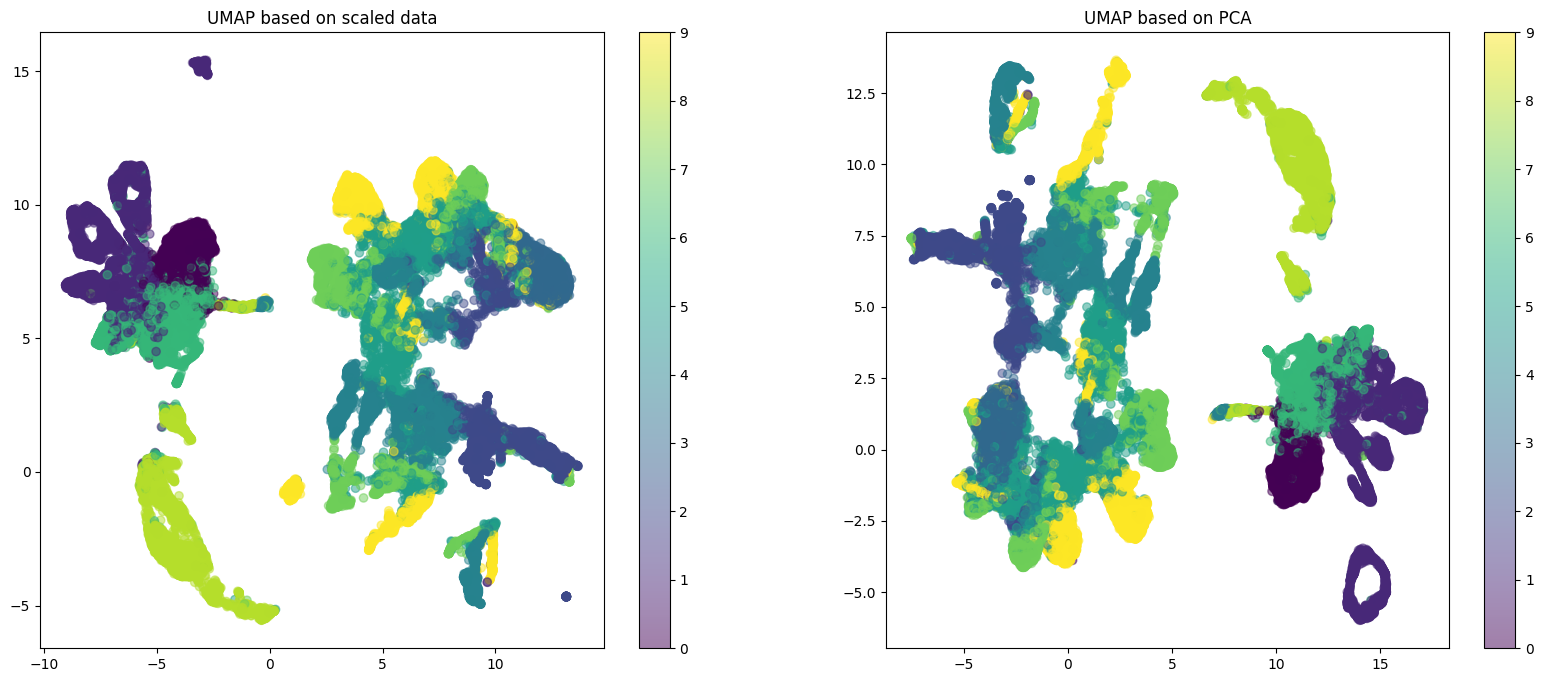

In [14]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.scatter(data_umap[:, 0], data_umap[:, 1], c=np.array(train_dataset.label), cmap='viridis', alpha=0.5)
plt.colorbar()
plt.title("UMAP based on scaled data") 

plt.subplot(1, 2, 2)
plt.scatter(data_umap_pca[:, 0], data_umap_pca[:, 1], c=np.array(train_dataset.label), cmap='viridis', alpha=0.5)
plt.colorbar()
plt.title("UMAP based on PCA")

plt.show()

In [16]:
# kemans 
kemans = KMeans(n_clusters=10, random_state=42, n_init=10)
clusters_kmeans = kemans.fit_predict(data_scaled)

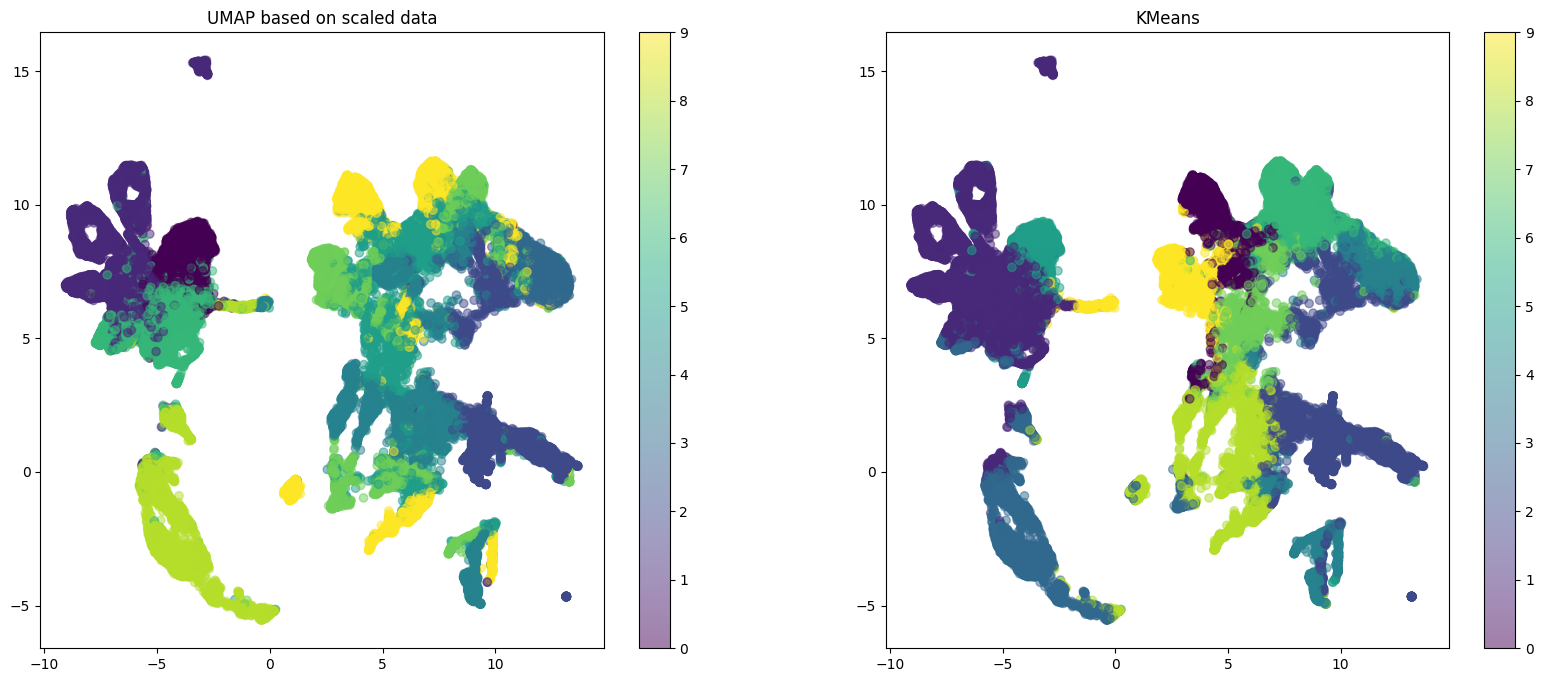

In [17]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.scatter(data_umap[:, 0], data_umap[:, 1], c=np.array(train_dataset.label), cmap='viridis', alpha=0.5)
plt.colorbar()
plt.title("UMAP based on scaled data") 

plt.subplot(1, 2, 2)
plt.scatter(data_umap[:, 0], data_umap[:, 1], c=clusters_kmeans, cmap='viridis', alpha=0.5)
plt.colorbar()
plt.title("KMeans")

plt.show()

In [18]:
# GMM
gmm = GaussianMixture(n_components=10, random_state=42)
clusters_gmm = gmm.fit_predict(data_scaled)

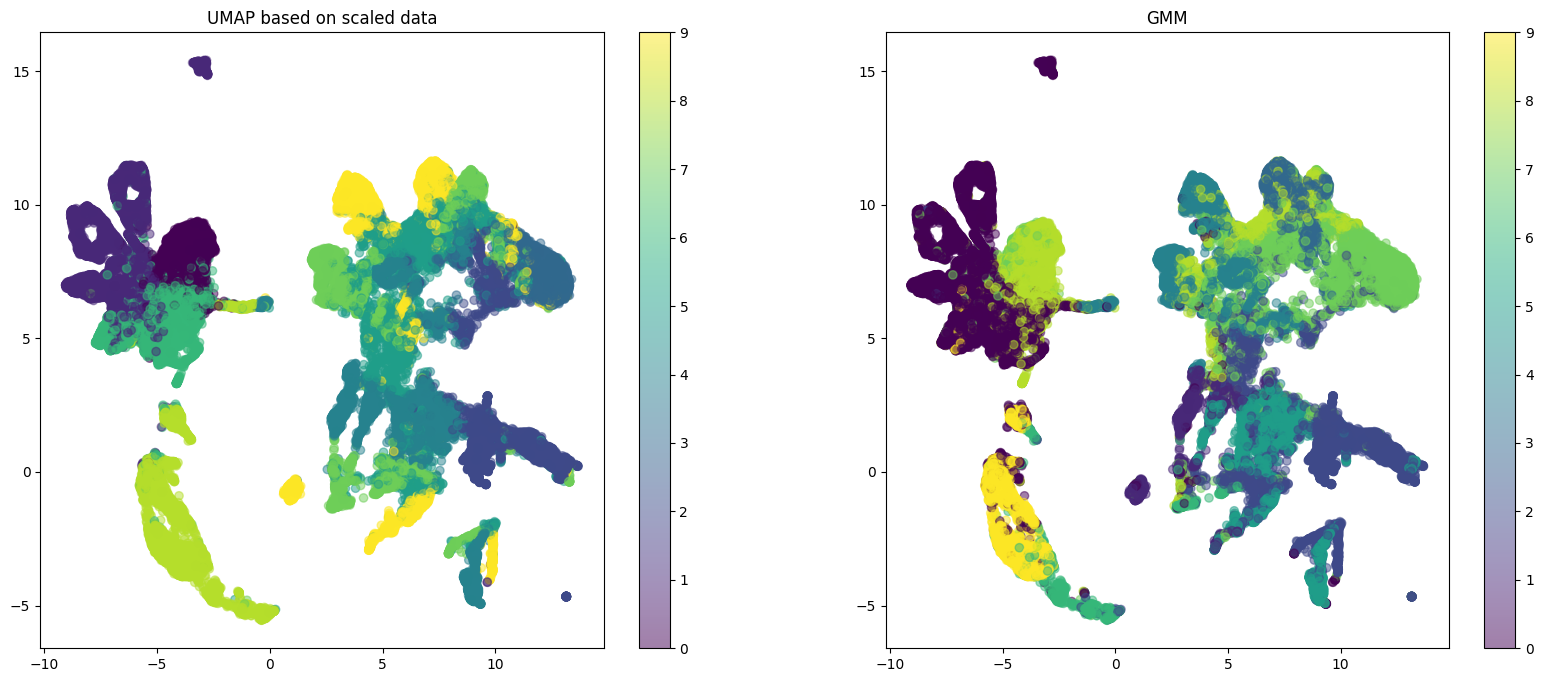

In [19]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.scatter(data_umap[:, 0], data_umap[:, 1], c=np.array(train_dataset.label), cmap='viridis', alpha=0.5)
plt.colorbar()
plt.title("UMAP based on scaled data") 

plt.subplot(1, 2, 2)
plt.scatter(data_umap[:, 0], data_umap[:, 1], c=clusters_gmm, cmap='viridis', alpha=0.5)
plt.colorbar()
plt.title("GMM")

plt.show()

In [30]:
# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=10, metric='cosine')
clusters_dbscan = dbscan.fit_predict(data_pca)